In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from sklearn.neighbors import LocalOutlierFactor
import re
import plotly.figure_factory as ff
import plotly.express as px
import os

import kagglehub
import pandas as pd 
from sklearn.cluster import KMeans
import dash
from dash import dcc, html, Input, Output 
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from sklearn.neighbors import LocalOutlierFactor
import re
import warnings
warnings.filterwarnings("ignore")

C:\Anaconda_Python\envs\Data_mining2\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.environ["OMP_NUM_THREADS"] = "1"
path = kagglehub.dataset_download("alejopaullier/usa-counties-coordinates")
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_excel(r'1952.xls')

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'


Peak ta Data

In [8]:
df.head(5)



,CaseID$,CNAME,STCODE,CCODE,TOTPOP,TOTMEMB,TOTCHUR,SDA_M,SDA_C,AOG_M,AOG_C,ABC_M,ABC_C,SBC_M,SBC_C,COB_M,COB_C,COGT_M,COGT_C,COGI_M,COGI_C,CGC_M,CGC_C,NAZRN_M,NAZRN_C,CCC_M,CCC_C,DOCIC_M,DOCIC_C,ARAPO_M,ARAPO_C,GRKAD_M,GRKAD_C,ERC_M,ERC_C,EUBC_M,EUBC_C,JEWS_M,JEWS_C,LDS_M,LDS_C,RLDS_M,RLDS_C,ALUTH_M,ALUTH_C,AELC_M,AELC_C,ELCA_M,ELCA_C,LCMS_M,LCMS_C,LUWS_M,LUWS_C,ULCA_M,ULCA_C,METH_M,METH_C,PCUS_M,PCUS_C,PCUSA_M,PCUSA_C,UPCNA_M,UPCNA_C,EPISC_M,EPISC_C,CRC_M,CRC_C,RCA_M,RCA_C,CATH_M,CATH_C,ACC_M,ACC_C,LAU_M,LAU_C,AMANA_M,AMANA_C,BAHAI_M,BAHAI_C,BAPGC_M,BAPGC_C,CUBA_M,CUBA_C,NABGC_M,NABGC_C,SDBGC_M,SDBGC_C,UNBAP_M,UNBAP_C,BPC_M,BPC_C,BRETO_M,BRETO_C,BRETP_M,BRETP_C,COGDU_M,COGDU_C,PLYBR_M,PLYBR_C,BRCHR_M,BRCHR_C,COCUS_M,COCUS_C,NJUSA_M,NJUSA_C,GCNJ_M,GCNJ_C,DIVSC_M,DIVSC_C,ACROC_M,ACROC_C,BEOC_M,BEOC_C,ECC_M,ECC_C,EFCA_M,EFCA_C,EMCCA_M,EMCCA_C,ACCA_M,ACCA_C,COG_M,COG_C,MISSB_M,MISSB_C,MCA_M,MCA_C,RSFC_M,RSFC_C,RSFGC_M,RSFGC_C,RSFF_M,RSFF_C,RSFPV_M,RSFPV_C,CYMF_M,CYMF_C,OYMFC_M,OYMFC_C,UCAMM_M,UCAMM_C,FSQU_M,FSQU_C,BICK_M,BICK_C,CUTLR_M,CUTLR_C,UELC_M,UELC_C,SELC_M,SELC_C,NEGM_M,NEGM_C,LUTHB_M,LUTHB_C,AELC_M2,AELC_C2,LUTHES_M,LUTHES_C,FINNL_M,FINNL_C,FINNS_M,FINNS_C,EVMEN_M,EVMEN_C,COMEN_M,COMEN_C,HUTTB_M,HUTTB_C,MENB_M,MENB_C,MENN_M,MENN_C,OOAMC_M,OOAMC_C,OOMEN_M,OOMEN_C,MENRE_M,MENRE_C,STMEN_M,STMEN_C,UMISS_M,UMISS_C,FMETH_M,FMETH_C,HMETH_M,HMETH_C,LRMET_M,LRMET_C,PRMET_M,PRMET_C,PRFRN_M,PRFRN_C,ZUAC_M,ZUAC_C,WESLN_M,WESLN_C,BOHMN_M,BOHMN_C,MORAV_M,MORAV_C,OCATH_M,OCATH_C,OBSC_M,OBSC_C,PENT_M,PENT_C,PENTH_M,PENTH_C,PILGH_M,PILGH_C,ARRPS_M,ARRPS_C,CPCH_M,CPCH_C,RECH_M,RECH_C,SOCBR_M,SOCBR_C,NSAC_M,NSAC_C,UNCHU_M,UNCHU_C,UBC_M,UBC_C,UCHRC_M,UCHRC_C,UCA_M,UCA_C,VEDS_M,VEDS_C,VLNTR_M,VLNTR_C,CGP_M,CGP_C
0,33,"Hale, AL",1,65,20832,5145,52,0,0,0,0,0,0,1522,14,0,0,0,0,86,4,0,0,55,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2846,20,456,9,0,0,0,0,146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,34,"Henry, AL",1,67,18674,4773,31,0,0,23,3,0,0,4051,21,0,0,0,0,0,0,0,1,0,0,116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,573,4,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35,"Houston, AL",1,69,46522,19420,88,87,2,379,10,0,0,11921,42,0,0,14,1,0,0,0,3,29,1,0,0,110,1,0,0,0,0,0,0,0,0,140,0,0,0,0,0,0,0,0,0,0,0,51,1,0,0,0,0,5541,22,677,4,0,0,0,0,257,1,0,0,0,0,214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36,"Jackson, AL",1,71,38998,9030,82,110,1,0,0,0,0,7875,58,0,0,252,5,0,0,0,0,37,2,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,3,0,0,44,2,0,0,102,2,0,0,0,0,0,1,68,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,400,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,37,"Jefferson, AL",1,73,558928,212326,595,991,4,648,15,0,0,94219,232,0,0,2070,29,935,18,0,19,634,8,445,2,2392,7,0,0,0,2,262,1,0,0,4476,0,0,0,76,1,105,1,0,0,0,0,376,2,0,0,456,2,65697,141,8642,24,5083,15,0,0,6187,14,0,0,0,0,16422,23

In [10]:
df.shape

(3075, 235)

In [12]:
df.dtypes

CaseID$     int64
CNAME      object
STCODE      int64
CCODE       int64
TOTPOP      int64
            ...  
VEDS_C      int64
VLNTR_M     int64
VLNTR_C     int64
CGP_M       int64
CGP_C       int64
Length: 235, dtype: object

In [14]:
df.describe()

,CaseID$,STCODE,CCODE,TOTPOP,TOTMEMB,TOTCHUR,SDA_M,SDA_C,AOG_M,AOG_C,ABC_M,ABC_C,SBC_M,SBC_C,COB_M,COB_C,COGT_M,COGT_C,COGI_M,COGI_C,CGC_M,CGC_C,NAZRN_M,NAZRN_C,CCC_M,CCC_C,DOCIC_M,DOCIC_C,ARAPO_M,ARAPO_C,GRKAD_M,GRKAD_C,ERC_M,ERC_C,EUBC_M,EUBC_C,JEWS_M,JEWS_C,LDS_M,LDS_C,RLDS_M,RLDS_C,ALUTH_M,ALUTH_C,AELC_M,AELC_C,ELCA_M,ELCA_C,LCMS_M,LCMS_C,LUWS_M,LUWS_C,ULCA_M,ULCA_C,METH_M,METH_C,PCUS_M,PCUS_C,PCUSA_M,PCUSA_C,UPCNA_M,UPCNA_C,EPISC_M,EPISC_C,CRC_M,CRC_C,RCA_M,RCA_C,CATH_M,CATH_C,ACC_M,ACC_C,LAU_M,LAU_C,AMANA_M,AMANA_C,BAHAI_M,BAHAI_C,BAPGC_M,BAPGC_C,CUBA_M,CUBA_C,NABGC_M,NABGC_C,SDBGC_M,SDBGC_C,UNBAP_M,UNBAP_C,BPC_M,BPC_C,BRETO_M,BRETO_C,BRETP_M,BRETP_C,COGDU_M,COGDU_C,PLYBR_M,PLYBR_C,BRCHR_M,BRCHR_C,COCUS_M,COCUS_C,NJUSA_M,NJUSA_C,GCNJ_M,GCNJ_C,DIVSC_M,DIVSC_C,ACROC_M,ACROC_C,BEOC_M,BEOC_C,ECC_M,ECC_C,EFCA_M,EFCA_C,EMCCA_M,EMCCA_C,ACCA_M,ACCA_C,COG_M,COG_C,MISSB_M,MISSB_C,MCA_M,MCA_C,RSFC_M,RSFC_C,RSFGC_M,RSFGC_C,RSFF_M,RSFF_C,RSFPV_M,RSFPV_C,CYMF_M,CYMF_C,OYMFC_M,OYMFC_C,UCAMM_M,UCAMM_C,FSQU_M,FSQU_C,BICK_M,BICK_C,CUTLR_M,CUTLR_C,UELC_M,UELC_C,SELC_M,SELC_C,NEGM_M,NEGM_C,LUTHB_M,LUTHB_C,AELC_M2,AELC_C2,LUTHES_M,LUTHES_C,FINNL_M,FINNL_C,FINNS_M,FINNS_C,EVMEN_M,EVMEN_C,COMEN_M,COMEN_C,HUTTB_M,HUTTB_C,MENB_M,MENB_C,MENN_M,MENN_C,OOAMC_M,OOAMC_C,OOMEN_M,OOMEN_C,MENRE_M,MENRE_C,STMEN_M,STMEN_C,UMISS_M,UMISS_C,FMETH_M,FMETH_C,HMETH_M,HMETH_C,LRMET_M,LRMET_C,PRMET_M,PRMET_C,PRFRN_M,PRFRN_C,ZUAC_M,ZUAC_C,WESLN_M,WESLN_C,BOHMN_M,BOHMN_C,MORAV_M,MORAV_C,OCATH_M,OCATH_C,OBSC_M,OBSC_C,PENT_M,PENT_C,PENTH_M,PENTH_C,PILGH_M,PILGH_C,ARRPS_M,ARRPS_C,CPCH_M,CPCH_C,RECH_M,RECH_C,SOCBR_M,SOCBR_C,NSAC_M,NSAC_C,UNCHU_M,UNCHU_C,UBC_M,UBC_C,UCHRC_M,UCHRC_C,UCA_M,UCA_C,VEDS_M,VEDS_C,VLNTR_M,VLNTR_C,CGP_M,CGP_C
count,3075.000000,3075.000000,3075.000000,3.075000e+03,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3.075000e+03,3075.0,3075.000000,3075.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.00000,3075.000000,3075.000000,3075.000000,3.075000e+03,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.0,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3075.000000,3

Drop counties with 0 church members and churches with 0 members

In [19]:
df = df.drop(columns=[col for col in df.columns if (df[col] == 0).all()])
df=df[df['TOTMEMB']!=0]
df.reset_index(level=None, drop=True, inplace=True)

Keep Church Populations

In [32]:
#keep columns with _M 
columns_with_m = df.columns[df.columns.str.endswith('_M')]

columns_with_m_list = columns_with_m.tolist()

# Append TOTEMB (we need it)
columns_with_m_list+=['TOTMEMB']

#Create a dataframe with members
df_members=df[columns_with_m_list]


Sum columns to get the total population per church

In [35]:
column_sums = df_members.sum(axis=0)

In [37]:
print(column_sums)

SDA_M        252554
AOG_M        459256
ABC_M       1528846
SBC_M       8121069
COB_M        189277
             ...   
UCA_M         75155
VEDS_M          769
VLNTR_M        7427
CGP_M         28912
TOTMEMB    74125462
Length: 108, dtype: int64


([], [])

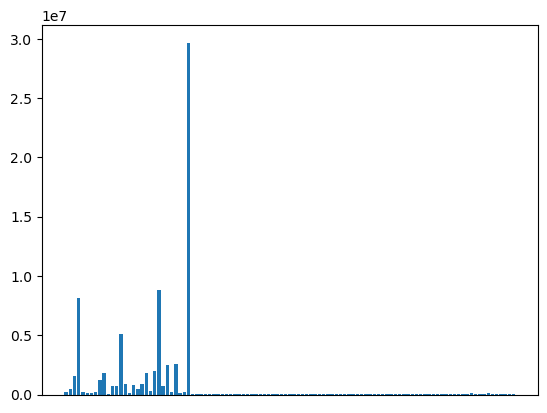

In [39]:
plt.bar(column_sums.index[:-1],column_sums.values[:-1])
plt.xticks([])

As we can see there is a big number of churches with low polulation.Few have extremely high population,let's see which are those churches.

In [42]:
print(column_sums[:-1].sort_values(ascending=False))

CATH_M     29688058
METH_M      8790025
SBC_M       8121069
JEWS_M      5112024
EPISC_M     2544320
             ...   
MISSB_M         237
BOHMN_M         225
STMEN_M         218
LAU_M           197
CUTLR_M          16
Length: 107, dtype: int64


Catholic,Methodist,Southern Baptists,Jews and Protestant Episcopal Church are the 5 most populated churches.

Percentage of orthodox per county

In [46]:
df['ORT_PERC']=(df['ARAPO_M']+df['BEOC_M'])/df['TOTPOP']

In [48]:
df[['CNAME','ORT_PERC']].sort_values(by='ORT_PERC', ascending=False)

,CNAME,ORT_PERC
163,"Cherokee, AL",0.011342
617,"Madison, IL",0.002304
132,"Fresno, CA",0.002275
3025,"Racine, WI",0.001944
2276,"Providence, RI",0.001734
...,...,...
1033,"Marion, KY",0.000000
1034,"Marshall, KY",0.000000
1035,"Martin, KY",0.000000
1036,"Mason, KY",0.000000


Cherokee.AL,Madison.IL and Fresno.CA have the the highest per-person ratio of Orthodox Christian members.

To find the 3 most extreme counties with respect to the distribution of their churches across religions we will use LOF on church population distribution vectors.

In [52]:
df_members_perc = df_members.div(df['TOTMEMB'], axis=0)
lof = LocalOutlierFactor(n_neighbors=50, contamination=3/3069) 
outlier_scores = lof.fit_predict(df_members_perc)  # -1 indicates outliers, 1 indicates inliers

indices = np.where(outlier_scores == -1)



In [54]:
print(df['CNAME'].iloc[indices])

239     Hinsdale, CO
1813       Kings, NY
1955    Billings, ND
Name: CNAME, dtype: object


Create the fips codes from STDCODE and CCODE

In [57]:
df['STCODE'] = df['STCODE'].astype(str).str.zfill(2)
df['CCODE'] = df['CCODE'].astype(str).str.zfill(3)
df['FIPS']= df['STCODE']+df['CCODE']
df.reset_index(level=None, drop=True, inplace=True)

Download Coordinates of FIPS Codes

In [60]:
coordinates = pd.read_csv(f'{path}\cfips_location.csv')
coordinates['cfips'] = coordinates['cfips'].astype(str).apply(lambda x: x.zfill(5))
coordinates=coordinates.rename(columns={'cfips':'FIPS'})

Append Coordinates of the FIPS Codes

In [63]:
#Bring FIPS in the 7th column and join coordinates
listofcolumns=[]
listofcolumns.extend(df.columns[0:6])
listofcolumns.extend(['FIPS'])
listofcolumns.extend(columns_with_m)


result = pd.merge(df[listofcolumns], coordinates, on='FIPS', how='inner')

We will perform weighted K-means with 1 centroid for each church.The weights will be the population of each church in each County. 
The resulting centroids will be stored in a new dataframe along with the name and the total population of the church for the whole country.

Initialize K-means and coordinates table.

In [67]:
kmeans = KMeans(n_clusters=1, n_init=10, random_state=0, max_iter=1000)
coords=result[['lng','lat']]

Select columns to perform clustering 

In [70]:
selected_columns = result.columns[7:-3]

Calculate total population per Church 

In [73]:
population_data = result[selected_columns].sum().values  # Calculate the sum for each column

In [75]:
print(result)

      CaseID$           CNAME STCODE CCODE  TOTPOP  TOTMEMB   FIPS  SDA_M   
0          33        Hale, AL     01   065   20832     5145  01065      0  \
1          34       Henry, AL     01   067   18674     4773  01067      0   
2          35     Houston, AL     01   069   46522    19420  01069     87   
3          36     Jackson, AL     01   071   38998     9030  01071    110   
4          37   Jefferson, AL     01   073  558928   212326  01073    991   
...       ...             ...    ...   ...     ...      ...    ...    ...   
3056     3070  Sweetwater, WY     56   037   22017    17771  56037     57   
3057     3071       Teton, WY     56   039    2593      968  56039      0   
3058     3072       Uinta, WY     56   041    7331     3817  56041      0   
3059     3073    Washakie, WY     56   043    7252     2378  56043     70   
3060     3074      Weston, WY     56   045    6733     2025  56045     92   

      AOG_M  ABC_M  SBC_M  COB_M  COGT_M  COGI_M  NAZRN_M  CCC_M  DOCIC_M  

Initialize the Dataframes that will store the results

In [78]:
centroids = pd.DataFrame({
    'Church': selected_columns,  # Take the first row from the transposed data
    'Population': population_data,
    'Long' : ' ',
    'Lat' : ' '
})

Run Weighted k-Means for each column in the selected columns and append Long,Lat in the respective row of the centroids table

In [81]:
for col in result.columns[7:-3]:
    wt=result[col]    
    wt_kmeansclus = kmeans.fit(coords, sample_weight = wt)
    centroids.loc[centroids['Church']==col,'Long']=wt_kmeansclus.cluster_centers_[0,0]
    centroids.loc[centroids['Church']==col,'Lat']=wt_kmeansclus.cluster_centers_[0,1]


The Centroids per church along with its total population in the country 

In [83]:
print(centroids)

      Church  Population       Long        Lat
0      SDA_M      250845 -98.133112  39.117811
1      AOG_M      457222 -95.860523  37.474369
2      ABC_M     1528732 -87.854617  40.457396
3      SBC_M     8028377 -88.622321  34.313007
4      COB_M      188976 -84.750488  39.657158
..       ...         ...        ...        ...
102  UCHRC_M         603 -76.526848  40.361065
103    UCA_M       75155 -76.902829  42.061985
104   VEDS_M         769 -94.480991  38.800026
105  VLNTR_M        7427 -89.071103  40.556448
106    CGP_M       28497 -87.284998  35.914694

[107 rows x 4 columns]


Now re will perform the same procendure for al the centroids obtain above, this time the weight of the weighted k-Means will be the total population of each church in the whole country.The coodinates of the centroid obtained will be the location of the proposed  cross-religion cente.That way the cross religious center will be closser to the centers of the most populated religions and farther from centers of less populated religions. 

In [85]:
final_centroid = pd.DataFrame(columns=['Church','Long','Lat'])



kmeans = KMeans(n_clusters=1, n_init=10, random_state=0, max_iter=1000)
final_kmeans = kmeans.fit(centroids[['Long','Lat']], sample_weight = centroids['Population'])
final_centroid.loc[0,'Church']='Cross-Religion Center'
final_centroid.loc[0,'Long']=final_kmeans.cluster_centers_[0,0]
final_centroid.loc[0,'Lat']=final_kmeans.cluster_centers_[0,1]

The proposed Cross Religion Center will be in :

In [87]:
print(final_centroid)

                  Church       Long        Lat
0  Cross-Religion Center -86.921807  39.216167


What follows is an interactive figure with two plots. In the first plot one can see a heatmap of the population of every church along with the centroid derived from the first weighted k-Means. Churches can be changed through the scrollbar .In the second plot one can see every centroid , with size depending on the total population of each church, along with a red star which is the proposed location of the cross religious center.

In [97]:
data = result  # Ensure your data contains the columns to choose from


geojson_url = "https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json"

app = dash.Dash(__name__)
fig_scatter = px.scatter_geo(
    centroids,
    lon='Long',
    lat='Lat',
    hover_name='Church',
    title="Static Points Overlay",
    color='Population',  # Color based on population
   color_continuous_scale='Viridis',
   size='Population'
)


fig_scatter.update_layout(
    paper_bgcolor='#f0f8ff',#Colouring
    plot_bgcolor='#f0f8ff',
    height=500,  # Height of the plot
    width=1000,  # Width of the plot
    geo=dict(
        bgcolor='#f0f8ff',
        lakecolor='rgb(255, 255, 255)',  # Background color for the map
        projection_type='albers usa' , # Projection type (optional)
        
    )
)

fig_scatter.add_scattergeo(
    lon=final_centroid['Long'],
    lat=final_centroid['Lat'],
    mode='markers',
    marker=dict(
        symbol='star',
        size=20,
        color='red',
    ),
    name="Cross-Religion Centre"  # Legend name for the star
)


app.layout = html.Div(style={'backgroundColor': '#f0f8ff'},children=[
    
    html.H1("Dynamic Choropleth Map with FIPS Codes"),

    
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in data.columns[7:-3] if col not in ['CNAME', 'FIPS']],
        value='AOG_M',  # Default column
        style={'width': '50%'}
    ),

    # Graph to show the map
    dcc.Graph(id='choropleth-map'),
    dcc.Graph(id='scatter-map', figure=fig_scatter)
])

# Callback to update the map 
@app.callback(
    Output('choropleth-map', 'figure'),
    [Input('column-dropdown', 'value')]
)
def update_map(selected_column):
    # Update the choropleth map based on selected column
    fig = px.choropleth(data,
                        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",  # GeoJSON for counties
                        locations='FIPS',  # FIPS codes
                        color=selected_column,  # Values to color the map
                        scope="usa",  # Focus on the USA
                        hover_name='CNAME',  # Show FIPS codes on hover
                        title=f"County-Level Map with {selected_column} Values",
                        color_continuous_scale='Hot',  # Diverging color scale focusing on 0
                        range_color=[data[selected_column].min(), data[selected_column].max()])  # Adjust color range if needed)
    fig.update_layout(
        paper_bgcolor='#f0f8ff', #Colouring
        plot_bgcolor='#f0f8ff',
        height=500,  # Height of the plot
        width=1000,  # Width of the plot
        geo=dict(
            bgcolor='#f0f8ff',
            lakecolor='rgb(255, 255, 255)',  # Background color for the map
            projection_type='albers usa'  # Projection type (optional)
        )
    )
    filtered_centroids = centroids[centroids['Church'] == selected_column]
    fig.add_scattergeo(
        lon=filtered_centroids['Long'].values, 
        lat=filtered_centroids['Lat'].values,
        mode='markers',
        marker=dict(size=20, color='purple'),
        name="Point Marker",
    )
    fig.write_html('static_map.html')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True,mode='inline')
    
    